In [1]:
pip install soccerplots

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from soccerplots.radar_chart import Radar

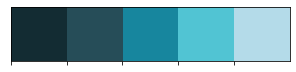

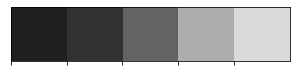

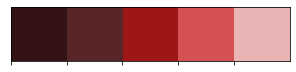

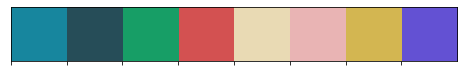

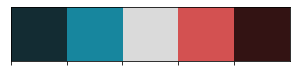

In [3]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [4]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = colors_dark[0]

In [5]:
df = pd.read_csv("Football teams.csv")
df.head(5)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [7]:
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [8]:
df.groupby('Tournament')['Team'].nunique()

Tournament
Bundesliga        18
LaLiga            20
Ligue 1           20
Premier League    20
Serie A           20
Name: Team, dtype: int64

In [9]:
EPL = df[df.Tournament=='Premier League']
LAL = df[df.Tournament=='LaLiga']
L1 = df[df.Tournament=='Ligue 1']
BL = df[df.Tournament=='Bundesliga']
SA = df[df.Tournament=='Serie A']

In [10]:
BL.reset_index(inplace=True)
BL.head()

,index,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
1,8,Borussia Dortmund,Bundesliga,75,14.6,43,1,57.5,85.5,12.8,6.84
2,18,Wolfsburg,Bundesliga,61,14.1,56,3,51.0,78.0,16.9,6.80
3,21,RB Leipzig,Bundesliga,60,16.0,57,0,57.3,83.2,18.6,6.78
4,25,Bayer Leverkusen,Bundesliga,53,13.0,58,0,57.3,84.4,13.1,6.73


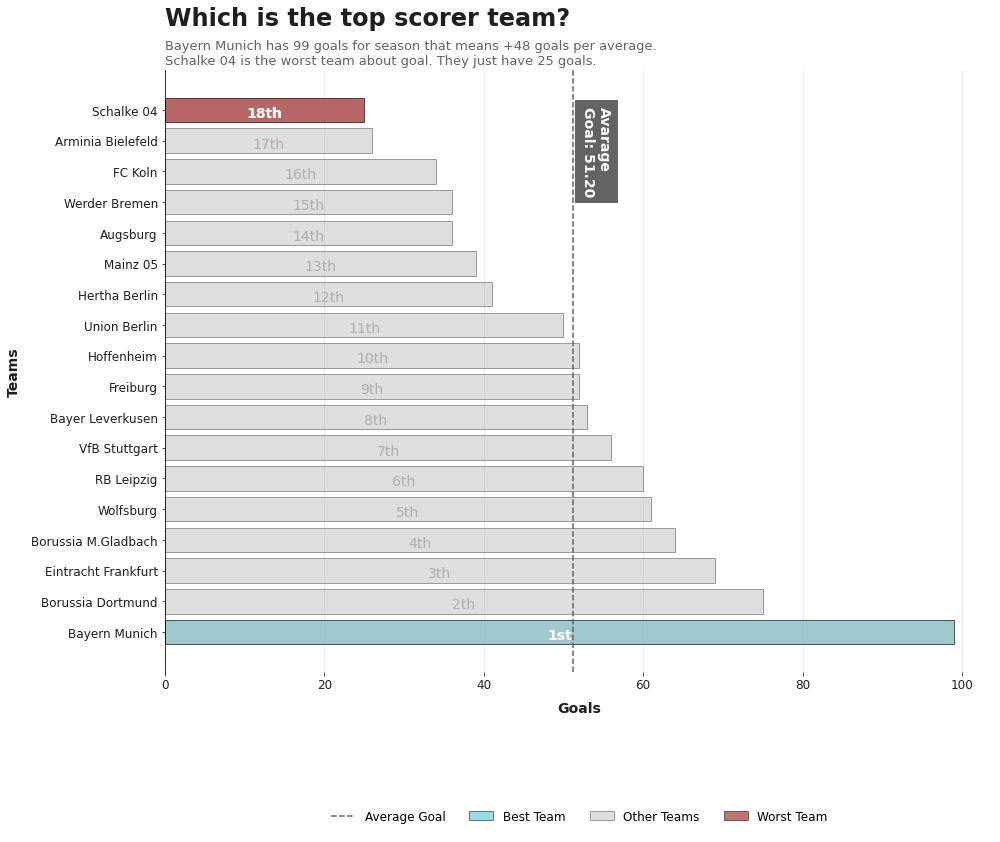

In [13]:
sorted_data = BL.sort_values(by="Goals",ascending=False)
sorted_data.reset_index(inplace=True)
epl_goal_top = sorted_data.iloc[0:1]
epl_goal_bot = sorted_data.iloc[-1]
mean_score = EPL['Goals'].mean()
epl_idx = list(sorted_data.index + 1)

fig, ax = plt.subplots(figsize=(14, 12))

bars0 = ax.barh(epl_goal_top['Team'], epl_goal_top['Goals'], color=colors_blue[3], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.barh(sorted_data['Team'], sorted_data['Goals'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.barh(epl_goal_bot['Team'], epl_goal_bot['Goals'], color=colors_red[2], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axvline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average Goal", "Best Team", "Other Teams" ,"Worst Team"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Goals", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Teams", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Avarage\nGoal: {:.2f}".format(mean_score),
    y=ymax-4,
    x=mean_score+1,
    backgroundcolor=colors_dark[2],
    fontsize=14,
    fontweight='bold',
    rotation=270,
    color='white'
)    
for i, bar in enumerate(bars1) : 
    x=bar.get_width(),
    y=bar.get_y(),
    if i !=0 and i != 19:
        ax.text(
            s=f"{epl_idx[i]}th",
            va='center', ha='center', 
            x=x[0]/2, y=y[0]+0.30,
            color=colors_dark[3],
            fontsize=14,
        )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_width(),
    y=bar.get_y(),
    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]/2, y=y[0]+0.30,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_width(),
    y=bar.get_y(),
    ax.text(
        s=f"18th",
        va='center', ha='center', 
        x=x[0]/2, y=y[0]+0.30,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Which is the top scorer team?", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Bayern Munich has 99 goals for season that means +48 goals per average.\nSchalke 04 is the worst team about goal. They just have 25 goals.", loc='left', fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()